Streaming Video Subscriptions
Subscription records for MavenFlix, a fictitious video streaming platform. Dataset includes information about ~2,800 subscribers from September 2022 through September 2023. Each record represents an individual customer's subscription, including the subscription cost, created/canceled date, interval, and payment status.

Recommended Analysis

How have MavenFlix subscriptions trended over time?

What percentage of customers have subscribed for 5 months or more?

What month had the highest subscriber retention, and the lowest?

(Source: Maven Analytics)

(License: Public Domain)

In [179]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns

In [180]:
df=pd.read_csv('Subscription Cohort Analysis Data.csv')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            3069 non-null   int64 
 1   created_date           3069 non-null   object
 2   canceled_date          2004 non-null   object
 3   subscription_cost      3069 non-null   int64 
 4   subscription_interval  3069 non-null   object
 5   was_subscription_paid  3069 non-null   object
dtypes: int64(2), object(4)
memory usage: 144.0+ KB


In [182]:
df.duplicated().sum()

0

In [183]:
df.head()

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid
0,154536156,2022-09-01,NaN,39,month,Yes
1,149713408,2022-09-01,2022-09-02,39,month,No
2,153756284,2022-09-01,2022-09-02,39,month,No
3,121253113,2022-09-01,2022-09-23,39,month,Yes
4,154467210,2022-09-01,2023-06-29,39,month,Yes


How have MavenFlix subscriptions trended over time?

In [184]:
df.created_date.unique().max()

'2023-09-08'

In [185]:
df.created_date.unique().min()

'2022-09-01'

In [186]:
df['creation_year_month']=pd.to_datetime(df['created_date']).dt.strftime('%m/%Y')

In [187]:
df['canceled_year_month']=pd.to_datetime(df['canceled_date']).dt.strftime('%m/%Y')

In [188]:
df['creation_year_month'].unique()

array(['09/2022', '10/2022', '11/2022', '12/2022', '01/2023', '02/2023',
       '03/2023', '04/2023', '05/2023', '06/2023', '07/2023', '08/2023',
       '09/2023'], dtype=object)

In [189]:
df=df.sort_values(by=['created_date'],ascending=True)

In [190]:
df.head(10)

,customer_id,created_date,canceled_date,subscription_cost,subscription_interval,was_subscription_paid,creation_year_month,canceled_year_month
0,154536156,2022-09-01,NaN,39,month,Yes,09/2022,NaN
10,154601651,2022-09-01,2022-09-26,39,month,Yes,09/2022,09/2022
9,154428434,2022-09-01,2022-10-31,39,month,Yes,09/2022,10/2022
8,154568379,2022-09-01,2022-10-25,39,month,Yes,09/2022,10/2022
7,148671505,2022-09-01,2022-11-23,39,month,Yes,09/2022,11/2022
6,154494346,2022-09-01,2022-11-26,39,month,Yes,09/2022,11/2022
11,122824692,2022-09-01,2022-09-15,39,month,Yes,09/2022,09/2022
4,154467210,2022-09-01,2023-06-29,39,month,Yes,09/2022,06/2023
3,121253113,2022-09-01,2022-09-23,39,month,Yes,09/2022,09/2022
2,153756284,2022-09-01,2022-09-02,39,month,No,09/2022,09/2022


In [191]:
df['is_current_month_subscriber']=''
for i in range(len(df)):
    if pd.to_datetime(df['created_date'][i])<=pd.to_datetime(df['canceled_date'][i]):
        df['is_current_month_subscriber'][i]=True
    else:
        df['is_current_month_subscriber'][i]=False

/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_84109/4263419904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_current_month_subscriber'][i]=False
/var/folders/db/5lq6wtyx2y39rtvf97mrmwfm0000gn/T/ipykernel_84109/4263419904.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_current_month_subscriber'][i]=True


In [192]:
df['is_current_month_subscriber'].unique()

array([False, True], dtype=object)

In [196]:
dfn_1=df.groupby(['creation_year_month','is_current_month_subscriber'])['is_current_month_subscriber'].count().sort_values().reset_index(name='Number_of_Subscribers')


In [204]:
dfn_1=dfn_1.sort_values(by='creation_year_month',ascending=False)

<AxesSubplot:xlabel='creation_year_month', ylabel='Number_of_Subscribers'>

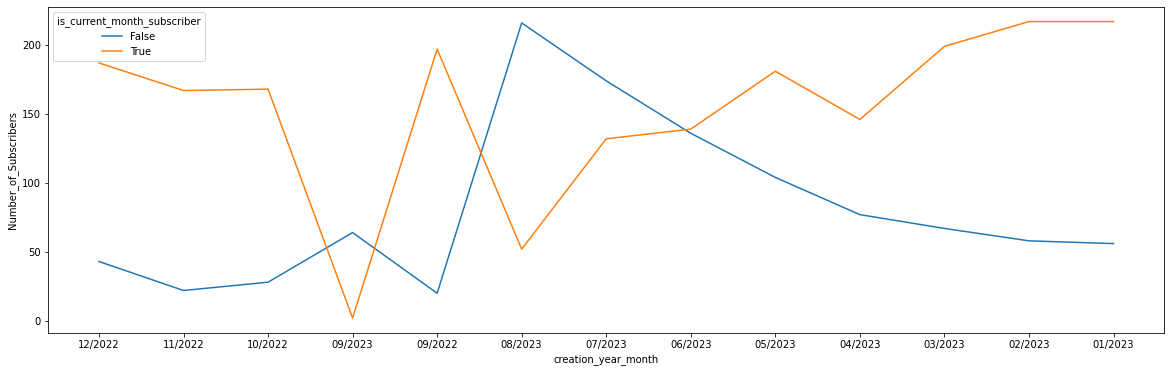

In [205]:
plt.figure(figsize=(20,6))
sns.lineplot(x='creation_year_month',y='Number_of_Subscribers',data=dfn_1,hue='is_current_month_subscriber')


What percentage of customers have subscribed for 5 months or more?

In [35]:
df['no_subscription_months']=(pd.to_datetime(df[df['was_subscription_paid']=='Yes'].canceled_date)-pd.to_datetime(df[df['was_subscription_paid']=='Yes'].created_date))//np.timedelta64(1, 'M')

In [ ]:
# // rounds down to lowest decimal

In [37]:
df['no_subscription_months']

0       NaN
1       NaN
2       NaN
3       0.0
4       9.0
       ... 
3064    NaN
3065    NaN
3066    NaN
3067    NaN
3068    NaN
Name: no_subscription_months, Length: 3069, dtype: float64

In [39]:
print('What percentage of customers have subscribed for 5 months or more? ',df[df['no_subscription_months']>=5].customer_id.count())

What percentage of customers have subscribed for 5 months or more?  153


What month had the highest subscriber retention, and the lowest?

In [172]:
dfn=df[(df['was_subscription_paid']=='Yes') & (df['is_current_month_subscriber']==True)]

In [173]:
dfn1=dfn[['creation_year_month','is_current_month_subscriber']].value_counts().sort_values().reset_index(name='Number of Subscriptions Current Month')

In [174]:
print('What month had the highest subscriber retention')
dfn1.head(1)

What month had the highest subscriber retention


,creation_year_month,is_current_month_subscriber,Number of Subscriptions Current Month
0,09/2023,True,2


In [175]:
print('What month had the lowest subscriber retention')
dfn1.tail(1)

What month had the lowest subscriber retention


,creation_year_month,is_current_month_subscriber,Number of Subscriptions Current Month
12,02/2023,True,207
